<a href="https://colab.research.google.com/github/ShivangKeshri/Machine-Learning-Projects/blob/main/Mathematical_Linear_Regression_for_Machine_Learning_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm


In [ ]:
df = pd.read_csv('train (2).csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
df.shape

(700, 2)

In [ ]:
display(df.isnull().sum().sum())

1

In [ ]:

df.loc[df['y'].isnull()]

,x,y
213,3530.157369,NaN


In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.shape

(699, 2)

In [ ]:
df.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


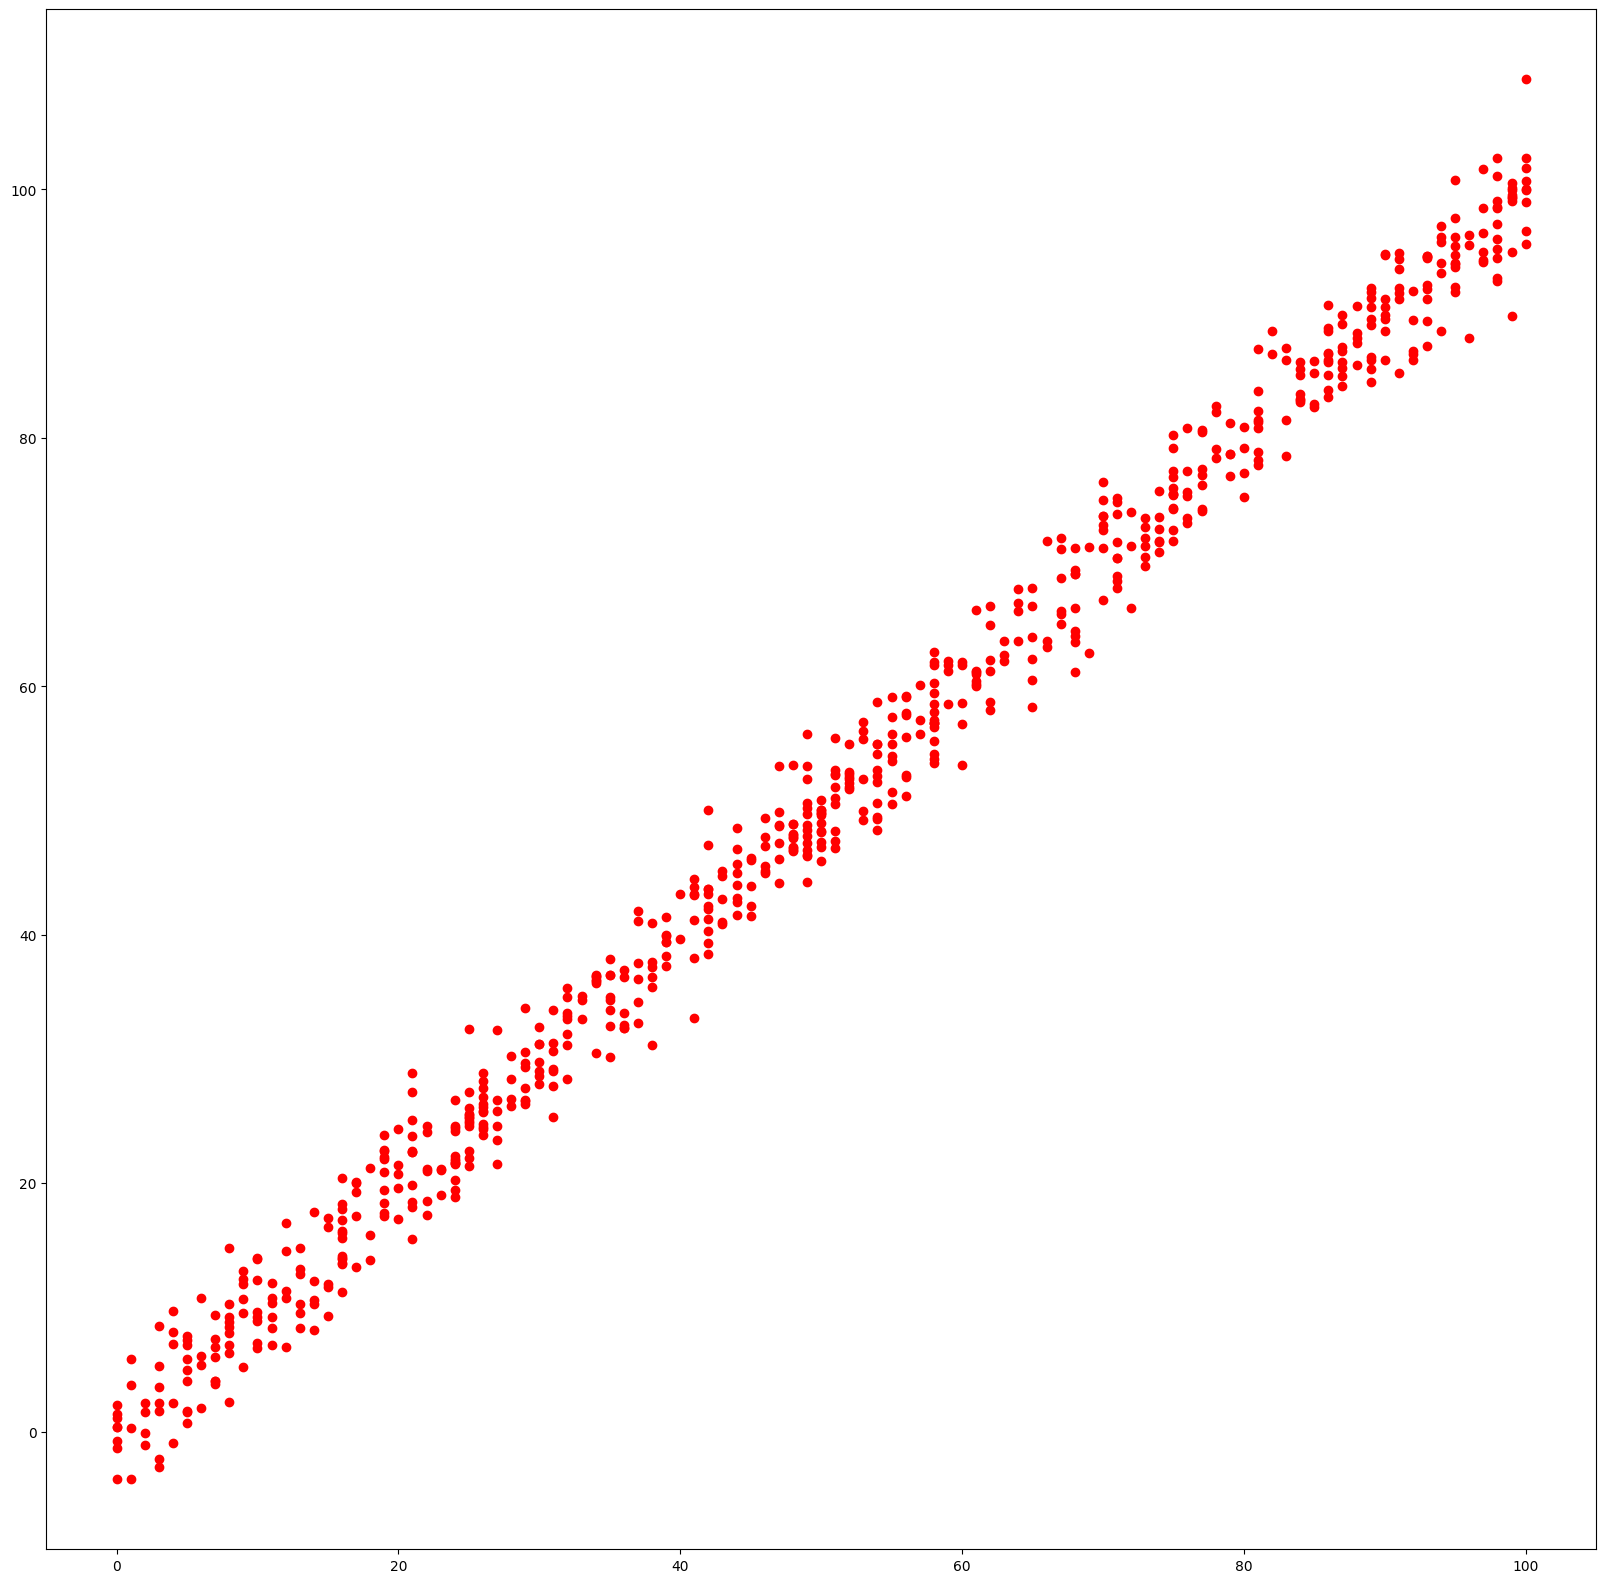

In [ ]:
plt.figure(figsize = (20,20))
plt.scatter(df.x, df.y, color = 'red')
plt.show()


In [ ]:
trainx = df.x.to_numpy()
trainy = df.y.to_numpy()
trainx.shape, trainy.shape

((699,), (699,))

In [ ]:
trainx = trainx.reshape((699,1)) /100
trainy = trainy.reshape((699,1)) /108
trainx.shape, trainy.shape

((699, 1), (699, 1))

In [ ]:
trainx = np.c_[trainx,np.ones((699,1))]
trainx.shape

(699, 2)

In [ ]:
trainx

array([[0.24, 1.  ],
       [0.5 , 1.  ],
       [0.15, 1.  ],
       ...,
       [0.82, 1.  ],
       [0.66, 1.  ],
       [0.97, 1.  ]])

In [ ]:
def L2norm(y,yhat):
  return(y-yhat)**2

In [ ]:
def gradients(y,yhat,x):
  return -2*(y-yhat)*x # 2x1 is the matrix shape of the vector

In [ ]:
weights = np.array([[0.23],[0.69]])
def train(weights,epochs=10,lr = 0.01):
      for e in range(epochs):
        total = 0
      print(f'Epoch {e+1}')
      for x,y in zip(trainx,trainy):

          x = x.reshape((2,1))

          yhat = weights.T.dot(x)

          loss = L2norm(y.item(),yhat.item())

          gradient = gradients(y.item(),yhat.item(),x)

          weights = weights - lr*gradient

          total+=loss
      print(f'LOss {total/699}')
print('weights Before training: \n',weights)
print('_'*50)
train(weights)
print('_'*50)
print('weights After training:\n ',weights)


weights Before training: 
 [[0.23]
 [0.69]]
__________________________________________________
Epoch 10
LOss 0.03071505721344305
__________________________________________________
weights After training:
  [[0.23]
 [0.69]]


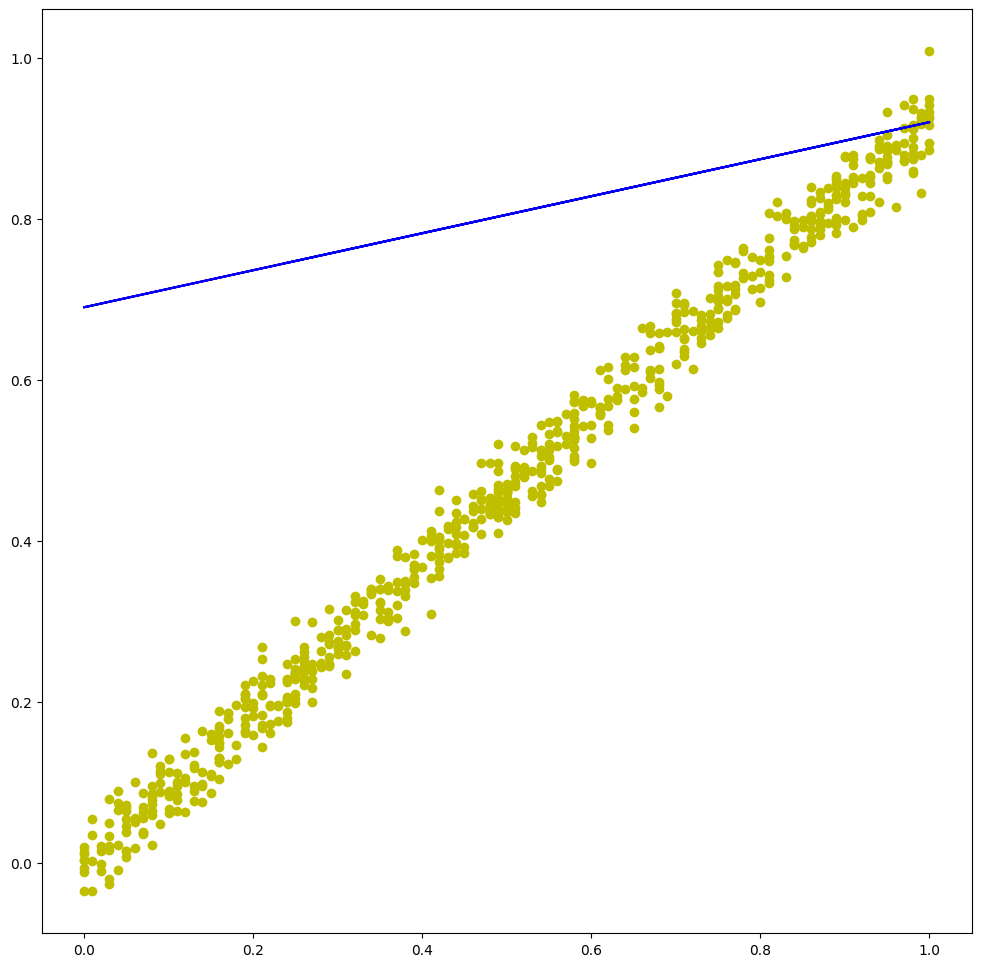

In [ ]:
plt.figure(figsize=(12,12))
w = np.array([[0.23],[0.69]])
plt.scatter(df.x/100,df.y/108,color='y')
plt.plot(df.x/100,trainx.dot(weights),color='r')
plt.plot(df.x/100,trainx.dot(w),color='b')

In [ ]:

test = pd.read_csv('test.csv')
test.isnull().sum().sum()

NameError: name 'pd' is not defined

In [ ]:
test.describe()

In [ ]:
tx = test.x.to_numpy()/100
ty = test.y.to_numpy()/105

tx = tx.reshape((tx.shape[0],1))
ty = ty.reshape((ty.shape[0],1))
tx = np.c_[tx,np.ones((tx.shape[0],1))]

tx.shape,ty.shape

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(test.x/100,tx.dot(weights),color='b')
plt.scatter(test.x/100,test.y/105,color='y')

In [ ]:
weights_norm = np.linalg.inv(trainx.T.dot(trainx)).dot(trainx.T).dot(trainy)
weights_norm

In [ ]:
((tx.dot(weights)-ty)**2).sum(),((tx.dot(weights_norm)-ty)**2).sum()

In [ ]:
plt.figure(figsize=(12,12))
# plt.plot(test.x/100,tx.dot(weights_norm),color='y')
plt.scatter(test.x/100,test.y/105,color='g')
plt.plot(test.x/100,tx.dot(weights_norm),color='r', label='normal eq')
plt.plot(test.x/100,tx.dot(weights),color='b',label='SGD')
plt.legend()

In [ ]:
weights,weights_norm